# DAT210x - Programming with Python for DS

## Module5- Lab1

Start by importing whatever you need to import in order to make this lab work:

In [17]:
# .. your code here ..
import os
import requests
import json
cwd = os.getcwd()

import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

import seaborn as sb
import numpy as np
import pandas as pd
from pandas import Series
import zipfile
from bs4 import BeautifulSoup
import re
from IPython.display import Image
from IPython.core.display import HTML 
from pandas import DataFrame, Panel

from sklearn.cluster import KMeans

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['figure.figsize'] = 10, 10
sb.set_style('whitegrid')


pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

pd.set_option('display.max_rows',15) # this limit maximum numbers of rows

In [3]:
cwd

'C:\\Programming with Python for Data Science\\Module5'

### How to Get The Dataset

1. Open up the City of Chicago's [Open Data | Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) page.
1. In the `Primary Type` column, click on the `Menu` button next to the info button, and select `Filter This Column`. It might take a second for the filter option to show up, since it has to load the entire list first.
1. Scroll down to `GAMBLING`
1. Click the light blue `Export` button next to the `Filter` button, and select `Download As CSV`

Now that you have th dataset stored as a CSV, load it up being careful to double check headers, as per usual:

In [7]:
# .. your code here ..
df = pd.read_csv('../module5/Datasets/Crimes_Gambling_2001_to_present.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14242 entries, 0 to 14241
Data columns (total 22 columns):
ID                      14242 non-null int64
Case Number             14242 non-null object
Date                    14242 non-null object
Block                   14242 non-null object
IUCR                    14242 non-null int64
Primary Type            14242 non-null object
Description             14242 non-null object
Location Description    14242 non-null object
Arrest                  14242 non-null bool
Domestic                14242 non-null bool
Beat                    14242 non-null int64
District                14242 non-null int64
Ward                    13118 non-null float64
Community Area          13118 non-null float64
FBI Code                14242 non-null int64
X Coordinate            14144 non-null float64
Y Coordinate            14144 non-null float64
Year                    14242 non-null int64
Updated On              14242 non-null object
Latitude               

In [11]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10002677,HY191890,03/20/2015 01:13:00 PM,020XX W 70TH ST,1661,GAMBLING,GAME/DICE,STREET,True,False,735,7,17.0,67.0,19,1164027.0,1858234.0,2015,02/10/2018 03:50:01 PM,41.766615,-87.674337,"(41.766615006, -87.674337321)"
1,10003802,HY193541,03/21/2015 06:45:00 PM,042XX W MONROE ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,1115,11,28.0,26.0,19,1148136.0,1899324.0,2015,02/10/2018 03:50:01 PM,41.879691,-87.731530,"(41.879691121, -87.731529667)"
2,10003937,HY193663,03/21/2015 07:55:00 PM,032XX W LAWRENCE AVE,1670,GAMBLING,GAME/AMUSEMENT DEVICE,SMALL RETAIL STORE,True,False,1713,17,39.0,14.0,19,1154071.0,1931710.0,2015,02/10/2018 03:50:01 PM,41.968445,-87.708871,"(41.968444682, -87.708871059)"
3,10004429,HY194332,03/22/2015 01:57:00 PM,019XX S ST LOUIS AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,1024,10,24.0,29.0,19,1153407.0,1890195.0,2015,02/10/2018 03:50:01 PM,41.854537,-87.712418,"(41.854537081, -87.71241763)"
4,10005837,HY195964,03/23/2015 08:40:00 PM,039XX W CERMAK RD,1661,GAMBLING,GAME/DICE,PARKING LOT/GARAGE(NON.RESID.),True,False,1014,10,24.0,29.0,19,1150290.0,1889088.0,2015,02/10/2018 03:50:01 PM,41.851561,-87.723887,"(41.851560618, -87.723887245)"


Get rid of any _rows_ that have nans in them:

In [8]:
df = df.dropna(axis=0)

Display the `dtypes` of your dset:

In [10]:
# .. your code here ..
print(df.dtypes)

ID                int64
Case Number      object
Date             object
Block            object
IUCR              int64
Primary Type     object
Description      object
                 ...   
X Coordinate    float64
Y Coordinate    float64
Year              int64
Updated On       object
Latitude        float64
Longitude       float64
Location         object
Length: 22, dtype: object


Coerce the `Date` feature (which is currently a string object) into real date, and confirm by displaying the `dtypes` again. This might be a slow executing process...

In [14]:
# .. your code here ..
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
print(df.dtypes)

ID                       int64
Case Number             object
Date            datetime64[ns]
Block                   object
IUCR                     int64
Primary Type            object
Description             object
                     ...      
X Coordinate           float64
Y Coordinate           float64
Year                     int64
Updated On              object
Latitude               float64
Longitude              float64
Location                object
Length: 22, dtype: object


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13029 entries, 0 to 14241
Data columns (total 22 columns):
ID                      13029 non-null int64
Case Number             13029 non-null object
Date                    13029 non-null datetime64[ns]
Block                   13029 non-null object
IUCR                    13029 non-null int64
Primary Type            13029 non-null object
Description             13029 non-null object
Location Description    13029 non-null object
Arrest                  13029 non-null bool
Domestic                13029 non-null bool
Beat                    13029 non-null int64
District                13029 non-null int64
Ward                    13029 non-null float64
Community Area          13029 non-null float64
FBI Code                13029 non-null int64
X Coordinate            13029 non-null float64
Y Coordinate            13029 non-null float64
Year                    13029 non-null int64
Updated On              13029 non-null object
Latitude       

In [25]:
def doKMeans(df):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    #
    # .. your code here ..
    df = df[['Longitude', 'Latitude']]


    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    #
    # .. your code here ..
    model = KMeans(n_clusters=7)
    model.fit(df)
    labels = model.predict(df)


    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    plt.show()

[[-87.63108338  41.69664745]
 [-87.70963973  41.87808776]
 [-87.61959989  41.80369208]
 [-87.58268675  41.75275981]
 [-87.68543715  41.98128232]
 [-87.66467564  41.77271944]
 [-87.7569697   41.89332634]]


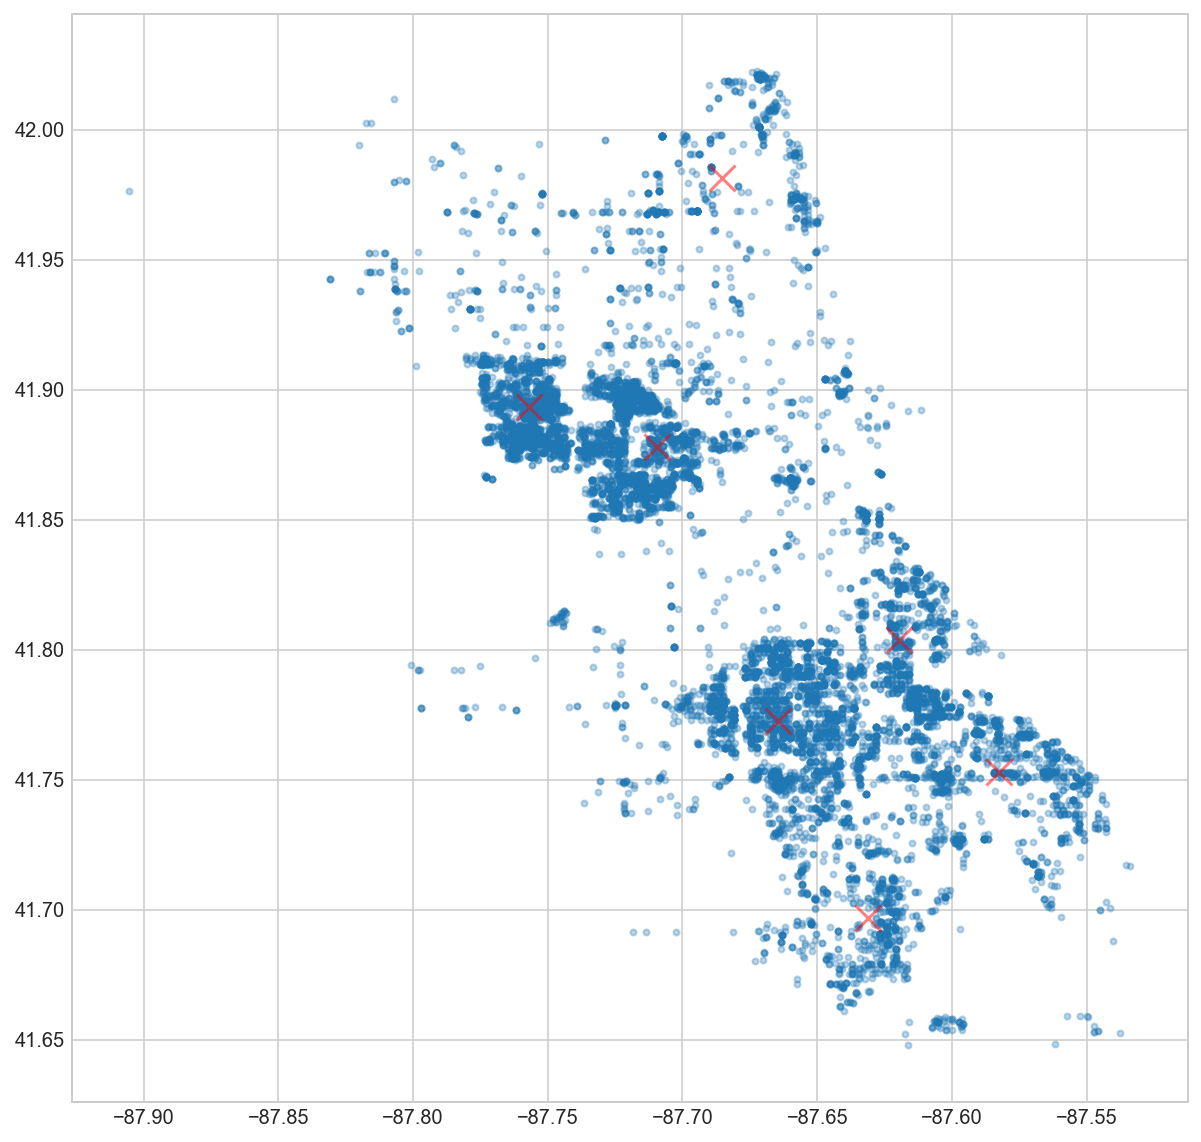

In [33]:
# Print & Plot your data
doKMeans(df)

Filter out the data so that it only contains samples that have a `Date > '2011-01-01'`, using indexing. Then, in a new figure, plot the crime incidents, as well as a new K-Means run's centroids.

In [34]:
# .. your code here 
df2 = df[df['Date'] > "2011-01-01"]

[[-87.61888255  41.79210152]
 [-87.75483156  41.889999  ]
 [-87.57994805  41.75041387]
 [-87.6647972   41.77567949]
 [-87.63498384  41.70559452]
 [-87.68715349  41.98350221]
 [-87.71067313  41.87540209]]


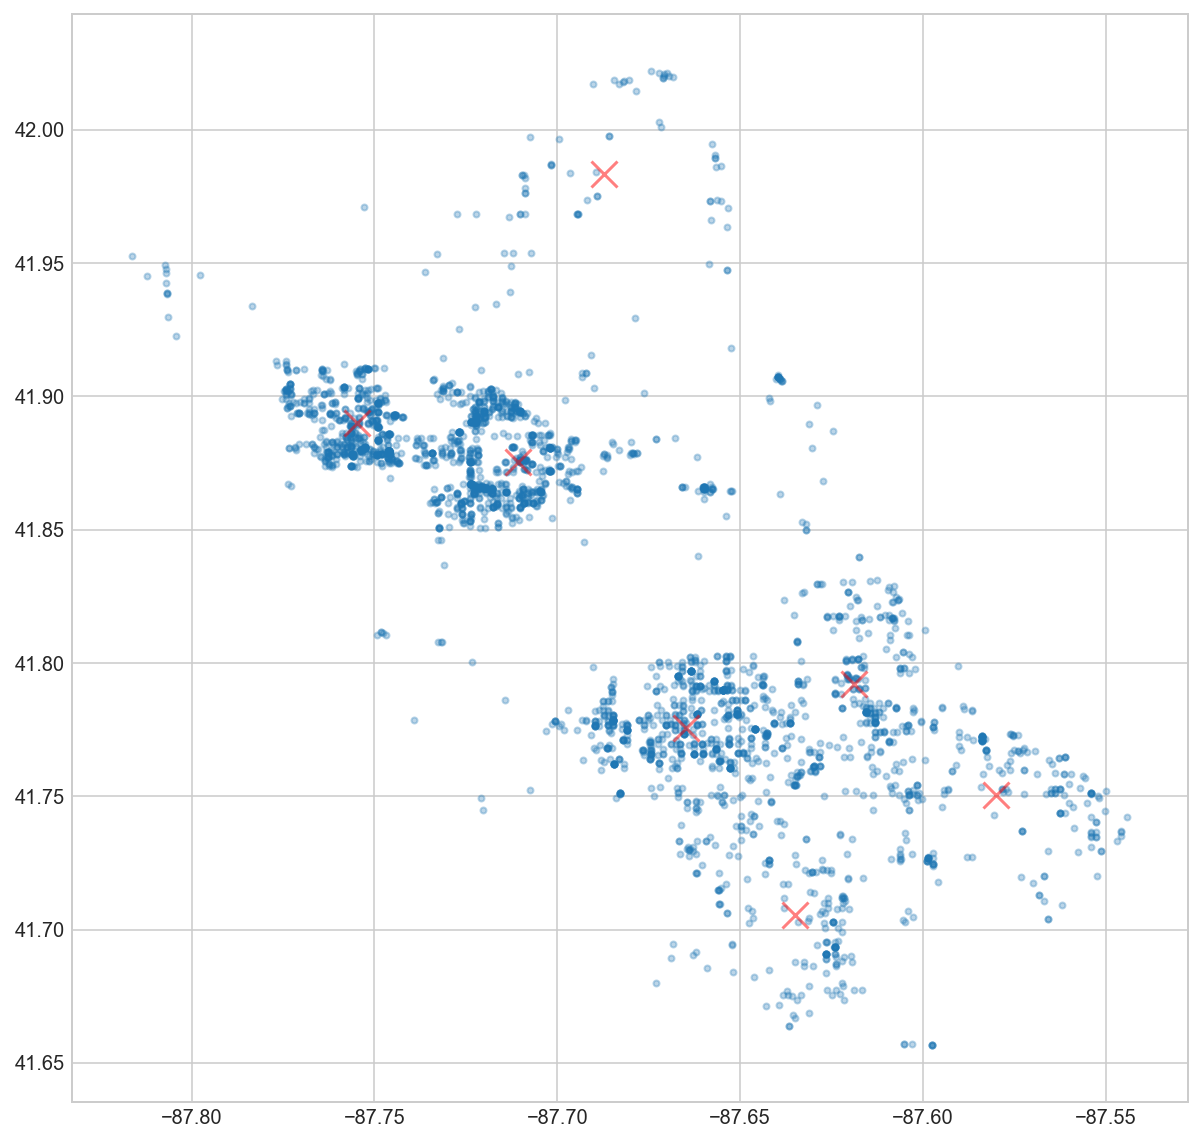

In [45]:
# Print & Plot your data
doKMeans(df2)